In this notebook we are going to present how to launch and perform experiments with the RFVM algorithm. The main goal of this model is to achieve a compact solution over binary classification fat-data problems. It is specially prepared to work within fat-data medical scenarios avoiding the dimensionality curse.

**Synthetic data generation**

To teach how to launch the model we created a classification toy-problem database.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification



N = 100 #Num of samples
D = 2000 #Num of features

X, y = make_classification(
        n_samples=N,
        n_features=D,
        n_classes=2,
        random_state=999
    )

Once we generated the database, we divide the data into train and test and standarize it

In [19]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

X_tr, X_tst, Y_tr, Y_tst = tts(X, y, test_size = 0.25, random_state = 31)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_tst = scaler.transform(X_tst)

**Training the model**

Once we have prepared the data we just have to fill it within the model and start the training process. Thus, before launching the code, let us clarify the parameters of the model fit function:


*   z: X train
*   t: Y train
*   z_tst: X test
*   t_tst: Y test
* hyper: Hyperparameter inizialization if required (default sparse priors)
* prune: If prune over features, 0 or 1 (default 0)
* pruning_crit: criteria of pruning for feature selection (default 0.01)
* maxit: Maximum number of iteration (deafult 5000)
* prune_a: If prune over samples, 0 or 1 (default 0)
* pruning_crit_a: criteria of pruning for relevance vector selection (default 0.001)
* tol: Tolerance treshold to stop the model training (default 1e-6)

Hence, let's train the model!






In [20]:
import RFVM_prune_elbo_dep

myModel = RFVM_prune_elbo_dep.LR_ARD()
np.random.seed(0)
myModel.fit(X_tr, Y_tr, X_tst, Y_tst, prune = 1, pruning_crit = 0.01, maxit = 5000, prune_a = 1, pruning_crit_a = 0.001, tol = 0.00001)


Iteration  0
Acc train:  0.41333333333333333
Acc test:  0.4
Iteration 1 Lower Bound 13026065.9 K 2000 Nv   75
Iteration  1
Acc train:  0.8133333333333334
Acc test:  0.36
Iteration 2 Lower Bound -1759400.1 K 2000 Nv   75
Iteration  2
Acc train:  0.8
Acc test:  0.4
Iteration 3 Lower Bound -1757909.9 K 2000 Nv   75
Iteration  3
Acc train:  0.8133333333333334
Acc test:  0.4
Iteration 4 Lower Bound -1756348.1 K 2000 Nv   75
Iteration  4
Acc train:  0.8266666666666667
Acc test:  0.4
Iteration 5 Lower Bound -1754719.0 K 2000 Nv   75
Iteration  5
Acc train:  0.8266666666666667
Acc test:  0.44
Iteration 6 Lower Bound -1753023.2 K 2000 Nv   75
Iteration  6
Acc train:  0.8533333333333334
Acc test:  0.44
Iteration 7 Lower Bound -1751260.2 K 1913 Nv   75
Iteration  7
Acc train:  0.8666666666666667
Acc test:  0.44
Iteration 8 Lower Bound -1867491.1 K 1913 Nv   75
Iteration  8
Acc train:  0.88
Acc test:  0.44
Iteration 9 Lower Bound -1864630.9 K 1913 Nv   75
Iteration  9
Acc train:  0.893333333333333

Here we show the final results obtained

In [26]:
#Print final values
print('Acc test: ', myModel.accu[-1])
print('Final ELBO: ', myModel.L[-1])
print('Percentage of features selected: ',(myModel.num_feat[-1]/np.shape(X_tr)[1])*100, '%')
print('Percentage of samples selected: ', (myModel.num_sample[-1]/np.shape(X_tr)[0])*100, '%')

Acc test:  1.0
Final ELBO:  1333537.71836122
Percentage of features selected:  0.3 %
Percentage of samples selected:  1.3333333333333335 %


Also, if we want to determine which are the selected features and samples, we can extract the final indices as

In [27]:
index_feat = myModel.index
index_sample = myModel.index_a

print('Indices features: ', index_feat)
print('Indices samples: ', index_sample)

Indices features:  [  90  199  338 1048 1382 1805]
Indices samples:  [71]


**Visualization of the results**

Once the model is trained, we can plot the evolution of certain parameters of the model. Hence, we show together the evolution along the model iterations of the ELBO (that guides the training process), the test accuracy and the two dimensional reduction procedures (features and samples).

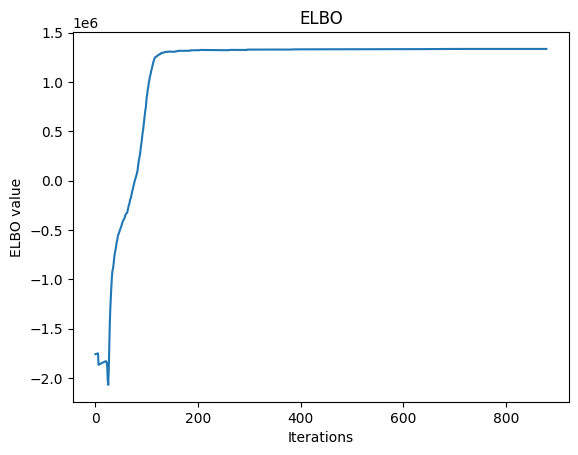

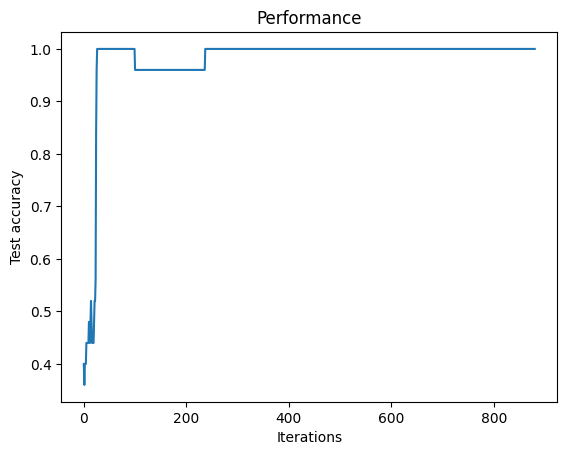

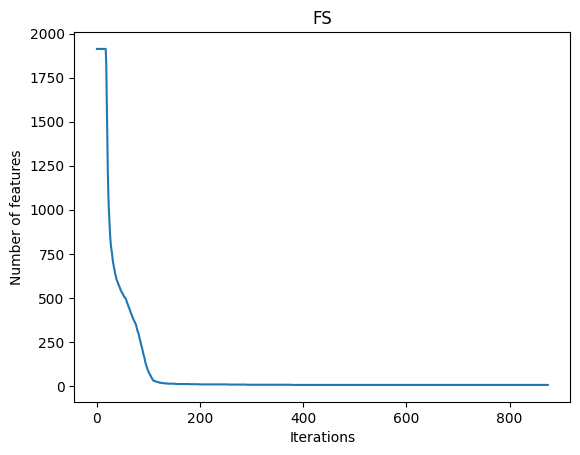

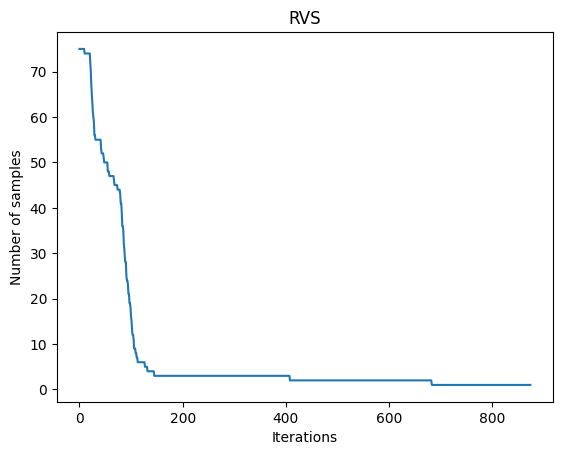

In [28]:
#Load values
Elbo = myModel.L
acc_tst = myModel.accu
num_feat = myModel.num_feat
num_sample = myModel.num_sample

#Print values
plt.plot(Elbo[1:])
plt.title('ELBO')
plt.ylabel('ELBO value')
plt.xlabel('Iterations')
plt.show()

plt.plot(acc_tst)
plt.title('Performance')
plt.ylabel('Test accuracy')
plt.xlabel('Iterations')
plt.show()

plt.plot(num_feat)
plt.title('FS')
plt.ylabel('Number of features')
plt.xlabel('Iterations')
plt.show()

plt.plot(num_sample)
plt.title('RVS')
plt.ylabel('Number of samples')
plt.xlabel('Iterations')
plt.show()

Seeing the plot figure, it is easy to appreciate that both the FS and RVM work together within the iterative loop. That is, the model perform both selections at the same time and in a coordinated way to exploit its benefits. Also, as we can appreciate, the great changes over the accuracy and the dimensionality reduction are performed while the ELBO experiment a hugh increasement, therefore, they tend to converge when the ELBO converges too.